<a href="https://colab.research.google.com/github/JakeOh/202505_BD50/blob/main/lab_da/ml10_decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report

# 데이터 셋

wine 데이터셋

In [4]:
wine_csv = 'https://bit.ly/wine_csv_data'

In [5]:
wine_df = pd.read_csv(wine_csv)

In [7]:
wine_df.head()

alcohol  sugar    pH  class
0      9.4    1.9  3.51    0.0
1      9.8    2.6  3.20    0.0
2      9.8    2.3  3.26    0.0
3      9.8    1.9  3.16    0.0
4      9.4    1.9  3.51    0.0

In [8]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [9]:
wine_df.describe()

alcohol        sugar           pH        class
count  6497.000000  6497.000000  6497.000000  6497.000000
mean     10.491801     5.443235     3.218501     0.753886
std       1.192712     4.757804     0.160787     0.430779
min       8.000000     0.600000     2.720000     0.000000
25%       9.500000     1.800000     3.110000     1.000000
50%      10.300000     3.000000     3.210000     1.000000
75%      11.300000     8.100000     3.320000     1.000000
max      14.900000    65.800000     4.010000     1.000000

In [10]:
class_counts = wine_df['class'].value_counts()

In [11]:
class_counts  #> 0 - red wine, 1 - white wine

class
1.0    4898
0.0    1599
Name: count, dtype: int64

## alcohol, sugar, pH 변수들의 히스토그램

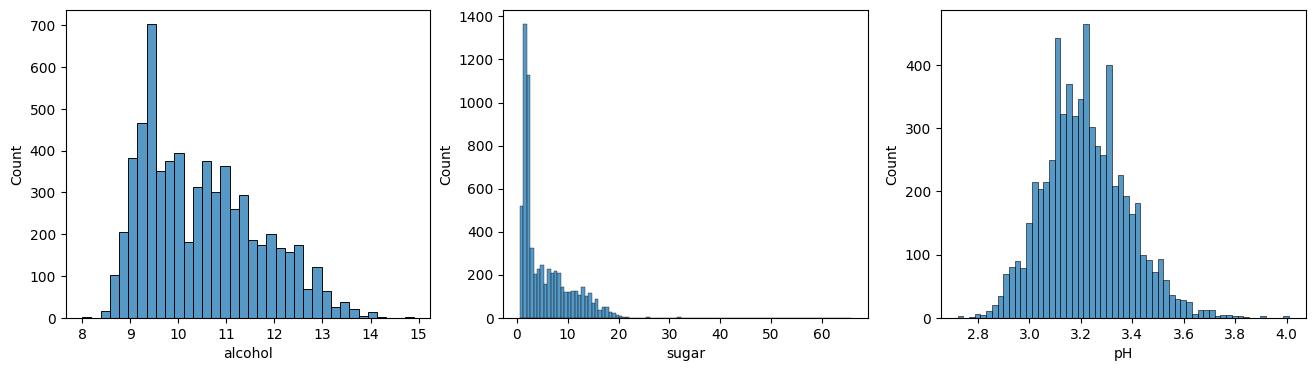

In [15]:
fig, axes = plt.subplots(ncols=3, figsize=(16, 4))

for i, col in enumerate(wine_df.columns[:3]):
    sns.histplot(data=wine_df, x=col, ax=axes[i])

plt.show()

## class 별로 색깔을 다르게 시각화한 pairplot

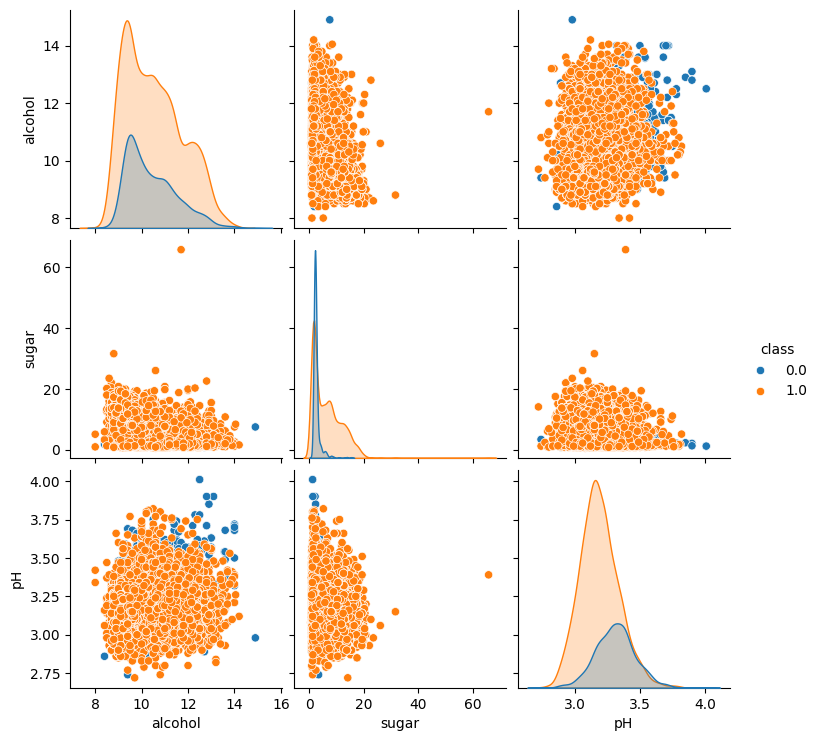

In [16]:
sns.pairplot(data=wine_df, hue='class')
plt.show()

# 훈련/테스트 나누기

In [17]:
X = wine_df[wine_df.columns[:3]].values  # 특성 배열(alcohol, sugar, pH)
y = wine_df['class'].values  # 타겟 배열(class)

In [18]:
X[:5, :]

array([[9.4 , 1.9 , 3.51],
       [9.8 , 2.6 , 3.2 ],
       [9.8 , 2.3 , 3.26],
       [9.8 , 1.9 , 3.16],
       [9.4 , 1.9 , 3.51]])

In [19]:
y[:5]

array([0., 0., 0., 0., 0.])

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [21]:
X_train.shape

(5197, 3)

In [22]:
X_test.shape

(1300, 3)

In [23]:
y_train.shape

(5197,)

In [24]:
y_test.shape

(1300,)

In [25]:
feature_names = wine_df.columns[:3]  # 특성 이름
target_names = ['red', 'white']  # 클래스 이름(레이블)
print(feature_names)
print(target_names)

Index(['alcohol', 'sugar', 'pH'], dtype='object')
['red', 'white']
